*Homework of First Week*

Load of the Data

In [1]:
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.feature_extraction import DictVectorizer

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
from sklearn.metrics import mean_squared_error

In [6]:
df = pd.read_parquet('fhv_tripdata_2021-01.parquet')

In [7]:
df_val = pd.read_parquet('fhv_tripdata_2021-02.parquet')

In [8]:
df.describe()

,PUlocationID,DOlocationID
count,195845.000000,991892.000000
mean,139.859690,135.898030
std,74.991382,80.474902
min,1.000000,1.000000
25%,75.000000,67.000000
50%,143.000000,132.000000
75%,206.000000,213.000000
max,265.000000,265.000000


In [9]:
df

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number
0,B00009,2021-01-01 00:27:00,2021-01-01 00:44:00,NaN,NaN,None,B00009
1,B00009,2021-01-01 00:50:00,2021-01-01 01:07:00,NaN,NaN,None,B00009
2,B00013,2021-01-01 00:01:00,2021-01-01 01:51:00,NaN,NaN,None,B00013
3,B00037,2021-01-01 00:13:09,2021-01-01 00:21:26,NaN,72.0,None,B00037
4,B00037,2021-01-01 00:38:31,2021-01-01 00:53:44,NaN,61.0,None,B00037
...,...,...,...,...,...,...,...
1154107,B03266,2021-01-31 23:43:03,2021-01-31 23:51:48,7.0,7.0,None,B03266
1154108,B03284,2021-01-31 23:50:27,2021-02-01 00:48:03,44.0,91.0,None,
1154109,B03285,2021-01-31 23:13:46,2021-01-31 23:29:58,171.0,171.0,None,B03285
1154110,B03285,2021-01-31 23:58:03,2021-02-01 00:17:29,15.0,15.0,None,B03285


Question 1

* Answer is 1154112

In [10]:
df.dtypes

dispatching_base_num              object
pickup_datetime           datetime64[ns]
dropOff_datetime          datetime64[ns]
PUlocationID                     float64
DOlocationID                     float64
SR_Flag                           object
Affiliated_base_number            object
dtype: object

In [11]:
df_val.shape

(1037692, 7)



* Set Of duration attribute



In [12]:
df['duration'] = df.dropOff_datetime - df.pickup_datetime

In [13]:
df_val['duration'] = df_val.dropOff_datetime - df_val.pickup_datetime

In [14]:
df

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number,duration
0,B00009,2021-01-01 00:27:00,2021-01-01 00:44:00,NaN,NaN,None,B00009,0 days 00:17:00
1,B00009,2021-01-01 00:50:00,2021-01-01 01:07:00,NaN,NaN,None,B00009,0 days 00:17:00
2,B00013,2021-01-01 00:01:00,2021-01-01 01:51:00,NaN,NaN,None,B00013,0 days 01:50:00
3,B00037,2021-01-01 00:13:09,2021-01-01 00:21:26,NaN,72.0,None,B00037,0 days 00:08:17
4,B00037,2021-01-01 00:38:31,2021-01-01 00:53:44,NaN,61.0,None,B00037,0 days 00:15:13
...,...,...,...,...,...,...,...,...
1154107,B03266,2021-01-31 23:43:03,2021-01-31 23:51:48,7.0,7.0,None,B03266,0 days 00:08:45
1154108,B03284,2021-01-31 23:50:27,2021-02-01 00:48:03,44.0,91.0,None,,0 days 00:57:36
1154109,B03285,2021-01-31 23:13:46,2021-01-31 23:29:58,171.0,171.0,None,B03285,0 days 00:16:12
1154110,B03285,2021-01-31 23:58:03,2021-02-01 00:17:29,15.0,15.0,None,B03285,0 days 00:19:26


In [15]:
td = df.duration.iloc[0]
td.total_seconds() / 60

17.0

In [16]:
td_ = df_val.duration.iloc[0]
td_.total_seconds() / 60

92.0

In [17]:
df.duration = df.duration.apply( lambda td: td.total_seconds() / 60)

In [18]:
df_val.duration = df_val.duration.apply( lambda td_: td_.total_seconds() / 60)

In [19]:
df

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number,duration
0,B00009,2021-01-01 00:27:00,2021-01-01 00:44:00,NaN,NaN,None,B00009,17.000000
1,B00009,2021-01-01 00:50:00,2021-01-01 01:07:00,NaN,NaN,None,B00009,17.000000
2,B00013,2021-01-01 00:01:00,2021-01-01 01:51:00,NaN,NaN,None,B00013,110.000000
3,B00037,2021-01-01 00:13:09,2021-01-01 00:21:26,NaN,72.0,None,B00037,8.283333
4,B00037,2021-01-01 00:38:31,2021-01-01 00:53:44,NaN,61.0,None,B00037,15.216667
...,...,...,...,...,...,...,...,...
1154107,B03266,2021-01-31 23:43:03,2021-01-31 23:51:48,7.0,7.0,None,B03266,8.750000
1154108,B03284,2021-01-31 23:50:27,2021-02-01 00:48:03,44.0,91.0,None,,57.600000
1154109,B03285,2021-01-31 23:13:46,2021-01-31 23:29:58,171.0,171.0,None,B03285,16.200000
1154110,B03285,2021-01-31 23:58:03,2021-02-01 00:17:29,15.0,15.0,None,B03285,19.433333


In [20]:
df.duration.mean()

19.1672240937939

In [21]:
df.duration.describe()

count    1.154112e+06
mean     1.916722e+01
std      3.986922e+02
min      1.666667e-02
25%      7.766667e+00
50%      1.340000e+01
75%      2.228333e+01
max      4.233710e+05
Name: duration, dtype: float64

Question 2
* Average trip duration is 19.16

/home/miki/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='duration', ylabel='Density'>

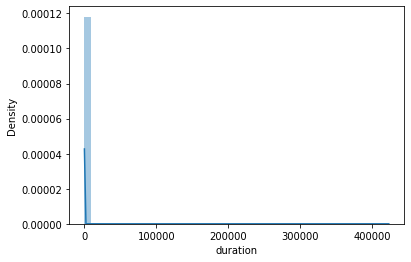

In [22]:
sns.distplot(df.duration)

In [23]:
df.isnull().sum()

dispatching_base_num            0
pickup_datetime                 0
dropOff_datetime                0
PUlocationID               958267
DOlocationID               162220
SR_Flag                   1154112
Affiliated_base_number        885
duration                        0
dtype: int64

In [24]:
(df['duration'] <= 0).sum()

0

Data Preparation

* There is no value of duration which is less than 0

In [25]:
df.shape

(1154112, 8)

In [26]:
((df['duration'] >= 0) & (df['duration'] <= 60)).describe()

count     1154112
unique          2
top          True
freq      1124850
Name: duration, dtype: object

In [27]:
df

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number,duration
0,B00009,2021-01-01 00:27:00,2021-01-01 00:44:00,NaN,NaN,None,B00009,17.000000
1,B00009,2021-01-01 00:50:00,2021-01-01 01:07:00,NaN,NaN,None,B00009,17.000000
2,B00013,2021-01-01 00:01:00,2021-01-01 01:51:00,NaN,NaN,None,B00013,110.000000
3,B00037,2021-01-01 00:13:09,2021-01-01 00:21:26,NaN,72.0,None,B00037,8.283333
4,B00037,2021-01-01 00:38:31,2021-01-01 00:53:44,NaN,61.0,None,B00037,15.216667
...,...,...,...,...,...,...,...,...
1154107,B03266,2021-01-31 23:43:03,2021-01-31 23:51:48,7.0,7.0,None,B03266,8.750000
1154108,B03284,2021-01-31 23:50:27,2021-02-01 00:48:03,44.0,91.0,None,,57.600000
1154109,B03285,2021-01-31 23:13:46,2021-01-31 23:29:58,171.0,171.0,None,B03285,16.200000
1154110,B03285,2021-01-31 23:58:03,2021-02-01 00:17:29,15.0,15.0,None,B03285,19.433333


In [28]:
df = df[ (df['duration'] >= 1) & (df['duration'] <= 60)]

In [29]:
df_val = df_val[ (df_val['duration'] >= 1) & (df_val['duration'] <= 60)]

In [30]:
df.shape

(1109826, 8)

In [31]:
df

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number,duration
0,B00009,2021-01-01 00:27:00,2021-01-01 00:44:00,NaN,NaN,None,B00009,17.000000
1,B00009,2021-01-01 00:50:00,2021-01-01 01:07:00,NaN,NaN,None,B00009,17.000000
3,B00037,2021-01-01 00:13:09,2021-01-01 00:21:26,NaN,72.0,None,B00037,8.283333
4,B00037,2021-01-01 00:38:31,2021-01-01 00:53:44,NaN,61.0,None,B00037,15.216667
5,B00037,2021-01-01 00:59:02,2021-01-01 01:08:05,NaN,71.0,None,B00037,9.050000
...,...,...,...,...,...,...,...,...
1154107,B03266,2021-01-31 23:43:03,2021-01-31 23:51:48,7.0,7.0,None,B03266,8.750000
1154108,B03284,2021-01-31 23:50:27,2021-02-01 00:48:03,44.0,91.0,None,,57.600000
1154109,B03285,2021-01-31 23:13:46,2021-01-31 23:29:58,171.0,171.0,None,B03285,16.200000
1154110,B03285,2021-01-31 23:58:03,2021-02-01 00:17:29,15.0,15.0,None,B03285,19.433333


In [32]:
df.reset_index(inplace=True, drop=True)

In [33]:
df_val.reset_index(inplace=True, drop=True)

In [34]:
df

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number,duration
0,B00009,2021-01-01 00:27:00,2021-01-01 00:44:00,NaN,NaN,None,B00009,17.000000
1,B00009,2021-01-01 00:50:00,2021-01-01 01:07:00,NaN,NaN,None,B00009,17.000000
2,B00037,2021-01-01 00:13:09,2021-01-01 00:21:26,NaN,72.0,None,B00037,8.283333
3,B00037,2021-01-01 00:38:31,2021-01-01 00:53:44,NaN,61.0,None,B00037,15.216667
4,B00037,2021-01-01 00:59:02,2021-01-01 01:08:05,NaN,71.0,None,B00037,9.050000
...,...,...,...,...,...,...,...,...
1109821,B03266,2021-01-31 23:43:03,2021-01-31 23:51:48,7.0,7.0,None,B03266,8.750000
1109822,B03284,2021-01-31 23:50:27,2021-02-01 00:48:03,44.0,91.0,None,,57.600000
1109823,B03285,2021-01-31 23:13:46,2021-01-31 23:29:58,171.0,171.0,None,B03285,16.200000
1109824,B03285,2021-01-31 23:58:03,2021-02-01 00:17:29,15.0,15.0,None,B03285,19.433333


Records Drop

* How many records was drop ? 
* Answer is : 1 154 112 - 1 109 826 = 44 286

In [35]:
def drop_nan(data):
    j = 0
    for x in data:
        if pd.isnull(x):
            data[j] = -1
        j = j + 1

In [38]:
drop_nan(df['PUlocationID'])
drop_nan(df['DOlocationID'])

In [39]:
drop_nan(df_val['PUlocationID'])
drop_nan(df_val['DOlocationID'])

In [40]:
df.isnull().sum()

dispatching_base_num            0
pickup_datetime                 0
dropOff_datetime                0
PUlocationID                    0
DOlocationID                    0
SR_Flag                   1109826
Affiliated_base_number        773
duration                        0
dtype: int64

In [42]:
(df['PUlocationID'] == -1).mean()

0.8352732770722617

Question 3

* Fraction of missing values for Pickup location  ID
* Answer is 83%

In [43]:
categorical = ['PUlocationID', 'DOlocationID']

In [45]:
df[categorical] = df[categorical].astype(str)

In [46]:
df_val[categorical] = df_val[categorical].astype(str)

In [47]:
df.dtypes

dispatching_base_num              object
pickup_datetime           datetime64[ns]
dropOff_datetime          datetime64[ns]
PUlocationID                      object
DOlocationID                      object
SR_Flag                           object
Affiliated_base_number            object
duration                         float64
dtype: object

In [48]:
train_dicts = df[categorical].to_dict(orient='records')

dv = DictVectorizer()

In [49]:
X_train = dv.fit_transform(train_dicts)

In [50]:
val_dicts = df_val[categorical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [51]:
X_train.shape

(1109826, 525)

Question 4

* What's the dimensionality of this matrix ?
* Answer is : 525 columns

In [52]:
target = 'duration'
y_train = df[target].values

In [53]:
y_val = df_val[target].values

In [54]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [55]:
y_pred = lr.predict(X_train)

/home/miki/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/miki/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


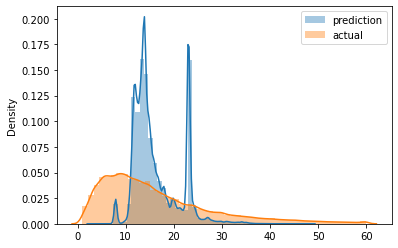

In [56]:
sns.distplot(y_pred, label='prediction')
sns.distplot(y_train, label='actual')

plt.legend()

In [57]:
mean_squared_error(y_train, y_pred, squared=False)

10.528519107211343

Question 5

* What's the RMSE on the training data?
* Answer is : 10.52

In [58]:
y_pred_val = lr.predict(X_val)

In [59]:
mean_squared_error(y_val, y_pred_val, squared=False)

11.014283193305987

Question 6

* What's RMSE on validation ?
* Answer is : 11.01